In [1]:
import pandas as pd

In [3]:
data = pd.read_table("water.txt")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [4]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [6]:
from statsmodels.stats.weightstats import _tconfint_generic

In [72]:
mean_dead = data.mortality.mean()
l = data.shape[0]
std_dead = data.mortality.std(ddof=1)/math.sqrt(l)

In [73]:
low_dead = _tconfint_generic(mean_dead, std_dead, l - 1, 0.05, 'two-sided')
round(low_dead[0],4)

1476.0833

#### Только для южных городов

In [75]:
mean_dead_south = data.loc[data.location == 'South', 'mortality'].mean()
l_south = data.loc[data.location == 'South', 'mortality'].shape[0]
std_dead_south = data.loc[data.location == 'South', 'mortality'].std(ddof=1)/math.sqrt(l_south)

In [76]:
dead_south = _tconfint_generic(mean_dead_south, std_dead_south, l_south - 1, 0.05, 'two-sided')
dead_south

(1320.1517462936238, 1433.463638321761)

In [77]:
round(dead_south[1],4)

1433.4636

#### Только для северных городов

In [67]:
mean_dead_north = data.loc[data.location == 'North', 'mortality'].mean()
std_dead_north = data.loc[data.location == 'North', 'mortality'].std(ddof=1)/math.sqrt(l_north-1)
l_north = data.loc[data.location == 'North', 'mortality'].shape[0]

In [68]:
dead_north = _tconfint_generic(mean_dead_north, std_dead_north, l_north - 1, 0.05, 'two-sided')
dead_north

(1586.5605251961385, 1680.6394748038613)

In [70]:
round(dead_north[1],4)

1680.6395

In [71]:
dead_south, dead_north

((1320.1517462936238, 1433.463638321761),
 (1586.5605251961385, 1680.6394748038613))

### Анализ жёсткости воды

In [59]:
import math

In [61]:
mean_hardss_south = data.loc[data.location == 'South', 'hardness'].mean()
std_hardss_south = data.loc[data.location == 'South', 'hardness'].std(ddof=1)/math.sqrt(l_south_hss)
l_south_hss = data.loc[data.location == 'South', 'hardness'].shape[0]

In [62]:
mean_hardss_north = data.loc[data.location == 'North', 'hardness'].mean()
std_hardss_north = data.loc[data.location == 'North', 'hardness'].std(ddof=1)/math.sqrt(l_south_hss)
l_north_hss = data.loc[data.location == 'North', 'hardness'].shape[0]

In [63]:
hss_south = _tconfint_generic(mean_hardss_south, std_hardss_south, l_south_hss - 1, 0.05, 'two-sided')
hss_south

(53.467198692036106, 86.07126284642544)

In [64]:
hss_north = _tconfint_generic(mean_hardss_north, std_hardss_north, l_north_hss - 1, 0.05, 'two-sided')
hss_north

(19.983942299129616, 40.81605770087038)

## Второй Quiz

In [78]:
from statsmodels.stats.proportion import proportion_confint

In [114]:
ans = proportion_confint(1, 50, method = 'normal')#, alpha = 0.05)
ans

(0.0, 0.05880530708179099)

In [91]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [92]:
import numpy as np

In [93]:
n_samples = int(np.ceil(samplesize_confint_proportion(1/50, 0.01)))
n_samples

753

In [94]:
x = []
y = []

for p in range(0,50):
    x.append(p)
    y.append(int(np.ceil(samplesize_confint_proportion(p/50, 0.01))))

In [95]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


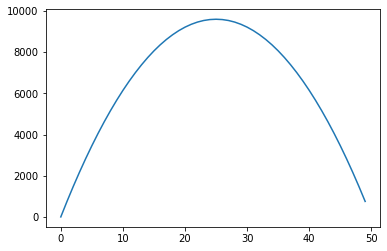

In [96]:
plt.plot(x,y)

In [112]:
int(np.ceil(samplesize_confint_proportion(25/50, 0.01)))

9604

## Третий Quiz (зачётный)

__1 задание__

In [116]:
from scipy.stats import norm

In [50]:
ans1 = round(norm(0,1).ppf(0.9985),4)
ans1

2.9677

__6 задание__

In [43]:
from scipy.stats import norm

In [55]:
asp_ones = np.ones(104)
asp_zeros = np.zeros(11037-104)
asp = np.concatenate((asp_ones, asp_zeros), axis = None)

In [56]:
plac_ones = np.ones(189)
plac_zeros = np.zeros(11034-189)
plac = np.concatenate((plac_ones, plac_zeros), axis = None)

In [54]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [58]:
round(proportions_confint_diff_ind(plac, asp, alpha = 0.05)[1],4)

0.0107

__7 задание__

In [34]:
round((189/(11034-189))/(104/(11037-104)),4)

1.8321

__8 задание__

In [5]:
import numpy as np

In [22]:
np.random.seed(0)

In [23]:
asp_ones = np.ones(104)
asp_zeros = np.zeros(11037-104)
asp = np.concatenate((asp_ones, asp_zeros), axis = None)

In [25]:
plac_ones = np.ones(189)
plac_zeros = np.zeros(11034-189)
plac = np.concatenate((plac_ones, plac_zeros), axis = None)

In [26]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [27]:
def odds(data):
    p = np.sum(data)/len(data)
    return p/(1-p)

In [28]:
asp_odds = list(map(odds, get_bootstrap_samples(asp, 1000)))
plac_odds = list(map(odds, get_bootstrap_samples(plac, 1000)))

In [52]:
len(asp_odds)

1000

In [29]:
div_odds = list(map(lambda x: x[0]/x[1], zip(plac_odds, asp_odds)))

In [30]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [32]:
round(stat_intervals(div_odds, 0.05)[0],4)

1.4442